In [34]:
%matplotlib inline
import math
import pandas, numpy, scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
data = pandas.read_excel("adhd.xls")

In [3]:
data.head()

,D0,D15,D30,D60
0,57,48,64,62
1,27,42,48,49
2,32,39,34,30
3,31,23,25,34
4,34,36,42,38


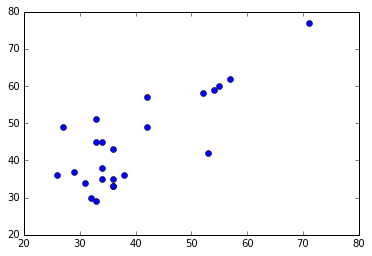

In [11]:
plt.plot(data['D0'], data['D60'], 'o')

In [12]:
#plt.show()

In [36]:
len_interval = round(math.pow(len(data), 1/3)*2)
n_bin = round((max(data['D0'])-min(data['D0']))/len_interval)
n_bin 

8.0

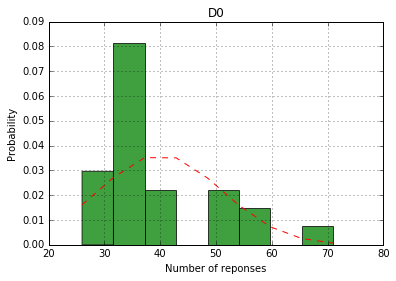

In [41]:
n, bins, patches = plt.hist(data['D0'], bins=8, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf(bins, 40, 11)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Number of reponses')
plt.ylabel('Probability')
plt.title('D0')
plt.grid(True)
plt.show()

In [43]:
len_interval = round(math.pow(len(data), 1/3)*2)
n_bins = round((max(data['D15'])-min(data['D15']))/len_interval)
n_bins 

6.0

39.666666666666664
9.135057490914814


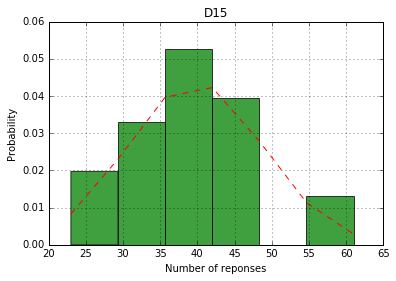

In [46]:
n, bins, patches = plt.hist(data['D15'], bins=6, normed=1, facecolor='green', alpha=0.75)
mu = data['D15'].mean()
sigma = data['D15'].std()
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Number of reponses')
plt.ylabel('Probability')
plt.title('D15')
plt.grid(True)
plt.show()

In [47]:
len_interval = round(math.pow(len(data), 1/3)*2)
n_bins = round((max(data['D30'])-min(data['D30']))/len_interval)
n_bins 

7.0

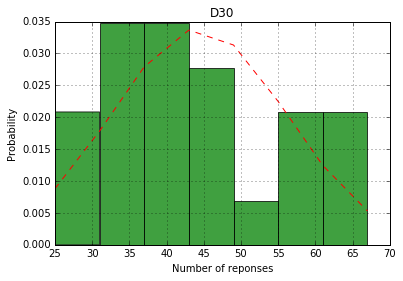

In [48]:
n, bins, patches = plt.hist(data['D30'], 7, normed=1, facecolor='green', alpha=0.75)
mu = data['D30'].mean()
sigma = data['D30'].std()
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Number of reponses')
plt.ylabel('Probability')
plt.title('D30')
plt.grid(True)
plt.show()

In [49]:
len_interval = round(math.pow(len(data), 1/3)*2)
n_bins = round((max(data['D60'])-min(data['D60']))/len_interval)
n_bins 

8.0

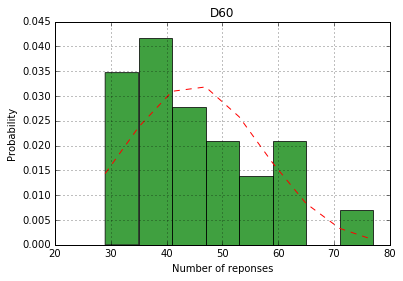

In [55]:
n, bins, patches = plt.hist(data['D60'], 8, normed=1, facecolor='green', alpha=0.75)
mu = data['D60'].mean()
sigma = data['D60'].std()
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Number of reponses')
plt.ylabel('Probability')
plt.title('D60')
plt.grid(True)
plt.show()

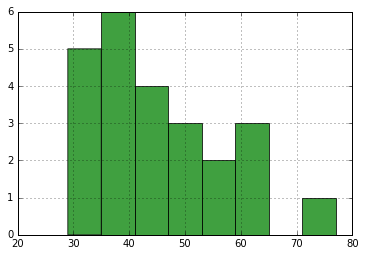

In [57]:
plt.hist(data['D60'], 8, histtype='bar', facecolor='green', alpha=0.75)
plt.grid(True)
plt.show()

In [66]:
data2 = data.loc[:,('D0', 'D60')]
data2['D60-D0'] = data['D60'] - data['D0']
data2.head()

,D0,D60,D60-D0
0,57,62,5
1,27,49,22
2,32,30,-2
3,31,34,3
4,34,38,4


In [92]:
#supposing that the two tests are independent, use the t-test to verify 
#whether there exists a significant difference of mean between the tow tests.

mu = data2['D60'].mean()-data2['D0'].mean()
mu

#mse = (numpy.var(data2['D60']) + numpy.var(data2['D0']))/2
mse = (data2['D60'].var() + data2['D0'].var())/2
mse

stand_error = math.sqrt(2*mse/24)
stand_error

t = mu/stand_error
t

1.4521635018159085

In [93]:
p = scipy.stats.t.cdf(-t, 46, 0, 1)*2
p

0.15324330469384106

In [104]:
r = scipy.stats.pearsonr(data2['D0'], data2['D60'])
r

(0.7998015698283919, 2.7330928302310238e-06)

In [105]:
numpy.corrcoef(data2['D0'], data2['D60'])

array([[ 1.        ,  0.79980157],
       [ 0.79980157,  1.        ]])

The result shows that the difference of means between the two tests is not significant.
However, this is not true. The two tests are not independent.
This is a typical result: correlated t tests almost always have greater power than independent-groups t tests.
This is because in correlated t tests, each difference score is a comparison of performance in one condition with the performance of that same subject in another condition.
The result is that the standard error of the difference between means is smaller in the correlated t test and, since this term is in the denominator of the formula for t, results in a larger t. (This is normal. As the two groups are correlated, the diversity between sampling is small.) 

In [117]:
r = scipy.stats.pearsonr(data2['D0'], data2['D60'])[0]
variance = data2['D0'].var() + data2['D60'].var() - 2*r*data2['D0'].std()*data2['D60'].std()
variance

56.824275362318787

In [118]:
t2 = mu/math.sqrt(variance/24)
t2

3.2223624451230424

In [119]:
p2 = scipy.stats.t.cdf(-mu/math.sqrt(variance/24), 46, 0, 1)*2
p2

0.0023380026714440484

Specific Comparisons (Correlated Oberservation)
Weapons and Aggression case

In [160]:
data_gun = pandas.read_excel("guns.xls")
data_gun.head()


,gender,aw,an,cw,cn
0,1,447,440,432,452
1,1,427,437,469,451
2,1,417,418,445,434
3,1,348,371,353,344
4,1,471,443,462,463


In [162]:
data_gun.shape

(32, 5)

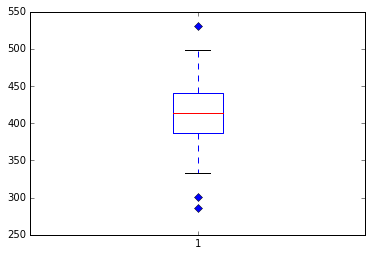

In [138]:
plt.boxplot(data_gun['aw'], 0, 'gD', 0.75)
plt.show()

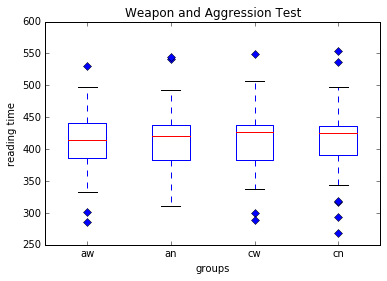

In [153]:
labels = ['aw', 'an', 'cw', 'cn']
toto = [data_gun['aw'], data_gun['an'], data_gun['cw'], data_gun['cn']]
plt.boxplot(toto, 0, 'gD', labels = labels)
plt.xlabel('groups')
plt.ylabel('reading time')
plt.title("Weapon and Aggression Test")
plt.show()


One question was whether reading times would be shorter when the preceding word was a weapon word (aw and cw conditions) than when it was a non-weapon word (an and cn conditions).

In [166]:
L1 = (data_gun['an']+data_gun['cn']) - (data_gun['aw']+data_gun['cw'])
mu = L1.mean()
sigma = L1.std()
sigma
stand_error = sigma/math.sqrt(32)
stand_error

4.264621433110087

In [167]:
t = mu/stand_error
t

1.377613486249236

In [168]:
p = scipy.stats.t.cdf(-t, 31, 0,1)*2
p

0.17818771014162121

A more interesting question is whether the priming effect (the difference between words preceded by a non-weapon word and words preceded by a weapon word) is different for aggressive words than it is for non-aggressive words.

In [170]:
L2 = (data_gun['an']-data_gun['aw']) - (data_gun['cn']-data_gun['cw'])
mu2 = L2.mean()
print(mu2)
sigma2 = L2.std()
print(sigma2)
stand_error2 = sigma2/math.sqrt(32)
print(stand_error2)

8.4375
22.134395216786547
3.9128452388132122


In [171]:
t2 = mu2/stand_error2
print(t2)
p2 = scipy.stats.t.cdf(-t2, 31, 0,1)*2
print(p2)

2.1563592437300536
0.0389275464766


In [173]:
scipy.stats.pearsonr(L1, L2)
numpy.corrcoef(L1, L2)

array([[ 1.        ,  0.11484756],
       [ 0.11484756,  1.        ]])

With the formula in specific comparisons

In [176]:
mse = (data_gun['an'].var() + data_gun['aw'].var() + data_gun['cn'].var() + data_gun['cw'].var())/4
print(mse)

3048.0055443548385


In [185]:

t1 = L1.mean()/math.sqrt(1*mse/32)
print(t1)

-0.24334965047169943


In [190]:
math.sqrt(1*mse/32)

9.759619524402

In [186]:
p1 = scipy.stats.t.cdf(t1, 4*32-4, 0, 1)*2
print(p1)

0.808136662863


In [191]:
t2 = L2.mean()/math.sqrt(4*mse/32)
print(t2)

0.4322658264957819


In [192]:
math.sqrt(4*mse/32)

19.519239048804

In [189]:
p2 = scipy.stats.t.cdf(-t2, 4*32-4, 0, 1)*2
print(p2)

0.666299007586


It is normal that the two p-values are very large. The formula used for independent groups cannot be applied for the correlated tests. For the correlated tests, once the linear combination is done, should use the formul for "testing a singal mean", cause the are not independent one from each other, they could not be taken as individual groups.